In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn

In [3]:
# Read CSV File
df = pd.read_csv("AggregatedVectorizationResults.csv", header=0)

# Set the style of seaborn

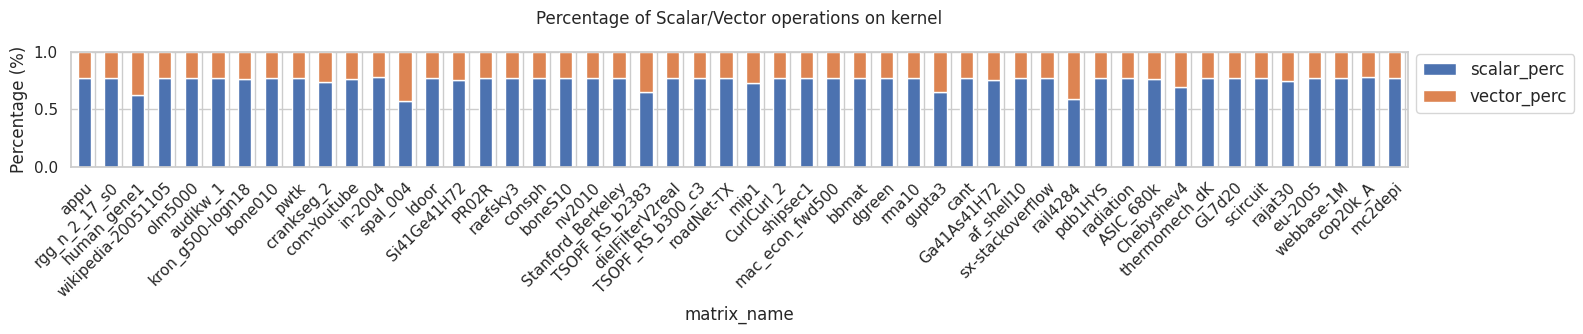

In [4]:
# Plot percentages of Vector/Scalar operations on kernel

# Plot Title
plotTitle = "Percentage of Scalar/Vector operations on kernel"

# Y-Axis Title
sideTitle = "Percentage (%)"

# X-Axis Title
xTitle = "Matrix"

# Time to plot
seaborn.set_theme(style="whitegrid", palette="deep")

fig, ax = plt.subplots(figsize=(16,3.5))

percentageDf = df[['matrix_name', 'scalar_perc', 'vector_perc']]
x_axis_titles = percentageDf['matrix_name']
percentageDf = percentageDf.set_index('matrix_name')

axes = percentageDf.plot(kind='bar', stacked=True, title=plotTitle, backend='matplotlib', figsize=(16,3.5), xlabel='matrix_name', ylabel=sideTitle, ax=ax)

ax.set_title(plotTitle, pad=20)

plt.legend(loc='upper left', bbox_to_anchor=(1, 1.05), fontsize=12)
ax.set_ylim(0,1)
ax.set_xticks([pos + 0.4 for pos in range(len(x_axis_titles))])

ax.set_xticklabels(x_axis_titles, rotation=45, ha='right')  # Adjust rotation angle as needed
plt.tight_layout()

Geometric Mean of the Difference: 13.230312959029686


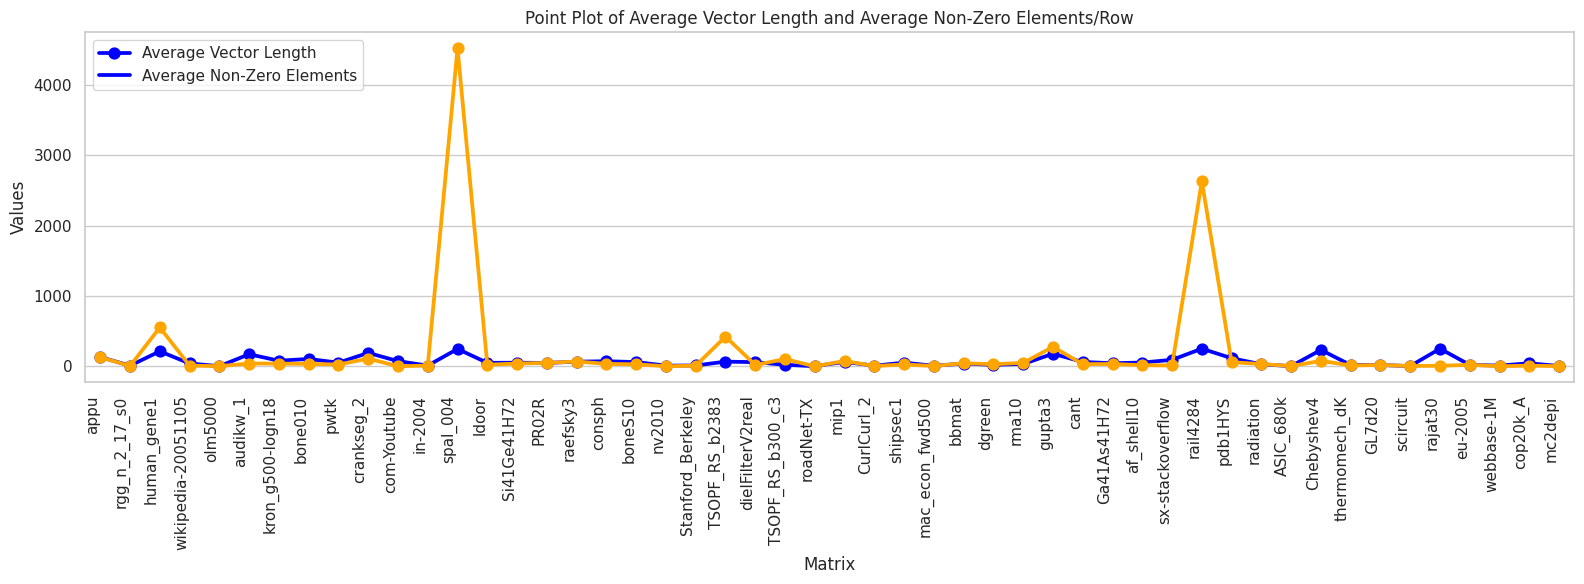

In [5]:
from scipy.stats import gmean

vectorLengthDf =  df[['matrix_name', 'average_vector_length', 'average_non_zero_per_rows']]

# Calculate the geometric mean of the difference
vector_length = vectorLengthDf['average_vector_length']
non_zero_elements = vectorLengthDf['average_non_zero_per_rows']
difference = abs(vector_length - non_zero_elements)
geomean_difference = gmean(difference[difference > 0])  # Exclude zeros for geometric mean
print(f"Geometric Mean of the Difference: {geomean_difference}")

# Create the point plot
plt.figure(figsize=(16, 6))
seaborn.pointplot(data=vectorLengthDf.reset_index(), x='matrix_name', y='average_vector_length', color='blue', label='Average Vector Length')
seaborn.pointplot(data=vectorLengthDf.reset_index(), x='matrix_name', y='average_non_zero_per_rows', color='orange', label='Average Non-Zero Elements')

plt.title("Point Plot of Average Vector Length and Average Non-Zero Elements/Row")
plt.xlabel("Matrix")
plt.ylabel("Values")
plt.xticks(rotation=90, ha='right')
plt.legend(["Average Vector Length", "Average Non-Zero Elements"], loc='upper left')
plt.tight_layout()
plt.show()